In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import random 
import scipy

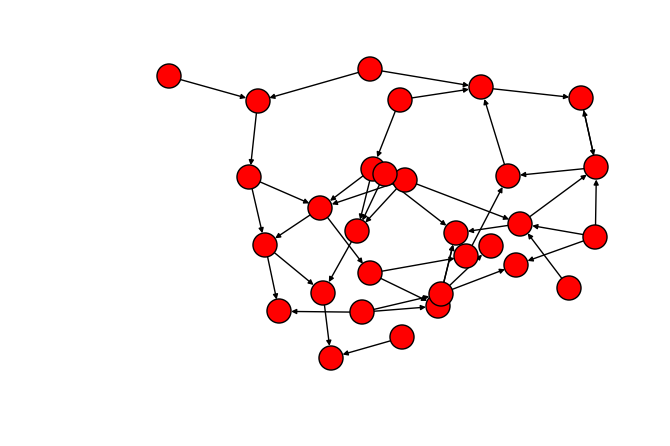

In [9]:
g = nx.erdos_renyi_graph(30, 0.05, directed=True, seed=123)
nx.draw(g, pos=nx.kamada_kawai_layout(g))
plt.show()

In [45]:
def approx_pagerank(g, n, alpha=.85):
    """Random surfer approximation to pagerank
    Input: graph, iterations, alpha
    output: dictionary of ranks
    """
    
    #random starting point
    current = random.choice(list(g.nodes))
    
    for node in list(g.nodes): g.nodes[node]['rank'] = 0
    
    for _ in range(n):  
        g.nodes[current]['rank'] += 1
        if random.random() < alpha and len(list(g.neighbors(current))) > 0:
            #neighbor
            current = random.choice(list(g.neighbors(current)))
        else:
            #random node
            current = random.choice(list(g.nodes))    
    # normalize
    return {key: value / (n * 1.0) for key, value in nx.get_node_attributes(g, 'rank').iteritems()}

In [47]:
errors = []
nlist = []
for n in range(7):
    nlist.append(n)
    ranks = approx_pagerank(g, int(10**n))
    errors.append(sum(abs(scipy.array(ranks.values()) - scipy.array(nx.pagerank(g).values()))))        

In [48]:
errors

[1.9455695528532426,
 1.192537919597294,
 0.37422553679346382,
 0.13378091418261587,
 0.058796003275085107,
 0.014470790472482764,
 0.0039269205251055671]

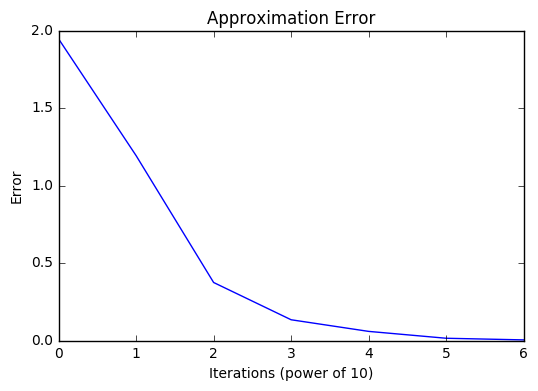

In [49]:
plt.plot( nlist, errors)
plt.title("Approximation Error")
plt.xlabel("Iterations (power of 10)")
plt.ylabel("Error")
plt.show()

In [46]:
ranks = approx_pagerank(g, 100)
ranks.values()

[0.0,
 0.11,
 0.0,
 0.01,
 0.09,
 0.03,
 0.03,
 0.04,
 0.01,
 0.04,
 0.02,
 0.01,
 0.01,
 0.03,
 0.05,
 0.0,
 0.03,
 0.0,
 0.0,
 0.1,
 0.01,
 0.02,
 0.06,
 0.01,
 0.06,
 0.06,
 0.06,
 0.02,
 0.01,
 0.08]